In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib import pyplot
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [2]:
CNN_score = pd.read_csv("/Users/amalalmansour/Desktop/New_Images/Spiculation/CNN_spic_var_distance.csv")
display(CNN_score)

,InstanceID,Agreement,Distance,Two_Agreement
0,4,Low Radiologist Agreement,2.342443,Low_No
1,118,All Radiologist Agreement,3.017614,Full_High
2,134,Low Radiologist Agreement,2.162333,Low_No
3,143,Low Radiologist Agreement,2.058751,Low_No
4,175,All Radiologist Agreement,2.761798,Full_High
...,...,...,...,...
1327,40771,High Radiologist Agreement,2.663353,Full_High
1328,40780,Low Radiologist Agreement,2.366905,Low_No
1329,40794,No Radiologist Agreement,2.137755,Low_No
1330,40801,No Radiologist Agreement,2.418558,Low_No


In [3]:
test_score = pd.read_csv("/Users/amalalmansour/Desktop/New_Images/Spiculation/test_2class.csv")

In [4]:
display(test_score)

,Unnamed: 0,noduleID,InstanceID,Dataset,Binary Rating,Bin_Rating,Binary_Rating_name,Agreement,Agreement_name,Two_Agreement,Two_Agreement_name,Category
0,3,4,143,1,2,2,Unknown,1,Low Radiologist Agreement,0,Low_No,Low/None
1,4,6,175,2,0,0,Not Spiculated,3,All Radiologist Agreement,1,Full_High,Training
2,5,7,179,2,0,0,Not Spiculated,3,All Radiologist Agreement,1,Full_High,Training
3,8,15,270,2,1,1,Spiculated,2,High Radiologist Agreement,1,Full_High,Testing
4,9,16,291,1,2,2,Unknown,1,Low Radiologist Agreement,0,Low_No,Low/None
...,...,...,...,...,...,...,...,...,...,...,...,...
261,1302,2600,39904,1,2,2,Unknown,1,Low Radiologist Agreement,0,Low_No,Low/None
262,1315,2628,40339,1,2,2,Unknown,0,No Radiologist Agreement,0,Low_No,Low/None
263,1319,2637,40570,1,2,2,Unknown,1,Low Radiologist Agreement,0,Low_No,Low/None
264,1323,2640,40658,2,0,0,Not Spiculated,3,All Radiologist Agreement,1,Full_High,Training


In [5]:
test_score["InstanceID"]

0        143
1        175
2        179
3        270
4        291
       ...  
261    39904
262    40339
263    40570
264    40658
265    40780
Name: InstanceID, Length: 266, dtype: int64

In [6]:
test= pd.merge(test_score["InstanceID"],CNN_score)
test

,InstanceID,Agreement,Distance,Two_Agreement
0,143,Low Radiologist Agreement,2.058751,Low_No
1,175,All Radiologist Agreement,2.761798,Full_High
2,179,All Radiologist Agreement,3.270619,Full_High
3,270,High Radiologist Agreement,3.874930,Full_High
4,291,Low Radiologist Agreement,2.341076,Low_No
...,...,...,...,...
261,39904,Low Radiologist Agreement,2.428144,Low_No
262,40339,No Radiologist Agreement,2.208237,Low_No
263,40570,Low Radiologist Agreement,1.921131,Low_No
264,40658,All Radiologist Agreement,2.429482,Full_High


In [32]:
CNN_score = test
display(max(CNN_score["Distance"]))

3.882142

In [9]:
cnn_score_above_01 = CNN_score.Distance>=.9
print (cnn_score_above_01)
print ("\n")
print (CNN_score[cnn_score_above_01])
print ("\n")
print (CNN_score[cnn_score_above_01].InstanceID)

0      True
1      True
2      True
3      True
4      True
       ... 
261    True
262    True
263    True
264    True
265    True
Name: Distance, Length: 266, dtype: bool


     InstanceID                   Agreement  Distance Two_Agreement
0           143   Low Radiologist Agreement  2.058751        Low_No
1           175   All Radiologist Agreement  2.761798     Full_High
2           179   All Radiologist Agreement  3.270619     Full_High
3           270  High Radiologist Agreement  3.874930     Full_High
4           291   Low Radiologist Agreement  2.341076        Low_No
..          ...                         ...       ...           ...
261       39904   Low Radiologist Agreement  2.428144        Low_No
262       40339    No Radiologist Agreement  2.208237        Low_No
263       40570   Low Radiologist Agreement  1.921131        Low_No
264       40658   All Radiologist Agreement  2.429482     Full_High
265       40780   Low Radiologist Agreement  2.366905        Low_No

[266 row

In [11]:
groups = CNN_score[cnn_score_above_01].groupby('Two_Agreement').count().reset_index()
# groups.plot(kind='bar',x='major',y='salary')
groups['Distance'][0]

141

In [12]:
two_groups = CNN_score.groupby('Two_Agreement').count().reset_index()
two_groups['Distance'][0]

141

In [13]:
import itertools
def seq(start, end, step):
    if step == 0:
        raise ValueError("step must not be 0")
    sample_count = int(abs(end - start) / step)
    return itertools.islice(itertools.count(start, step), sample_count)

In [33]:
count = 0
accuracy_lst = []
thresh = []
for i in seq(0, 3.9, 0.1):
    print(round(i,2))

    cnn_score_above_thr = CNN_score.Distance>= round(i,2)
    groups = CNN_score[cnn_score_above_thr].groupby('Two_Agreement').count().reset_index()
    FH_below = abs(two_groups['Distance'][0] - groups['Distance'][0])
    FH_above = groups['Distance'][0]
    LN_above = groups['Distance'][1]
    LN_below = abs(two_groups['Distance'][1] - groups['Distance'][1])
    print("full_high: ",FH_above, "low_no: ", LN_above)
    accuarcy = (FH_below+LN_above)/(FH_below+FH_above+LN_above+LN_below)
    accuracy_lst.append(accuarcy)
    thresh.append(i)
    
print(len(accuracy_lst))

0
full_high:  141 low_no:  125
0.1
full_high:  141 low_no:  125
0.2
full_high:  141 low_no:  125
0.3
full_high:  141 low_no:  125
0.4
full_high:  141 low_no:  125
0.5
full_high:  141 low_no:  125
0.6
full_high:  141 low_no:  125
0.7
full_high:  141 low_no:  125
0.8
full_high:  141 low_no:  125
0.9
full_high:  141 low_no:  125
1.0
full_high:  141 low_no:  124
1.1
full_high:  140 low_no:  124
1.2
full_high:  139 low_no:  124
1.3
full_high:  139 low_no:  122
1.4
full_high:  135 low_no:  119
1.5
full_high:  127 low_no:  113
1.6
full_high:  120 low_no:  107
1.7
full_high:  115 low_no:  99
1.8
full_high:  104 low_no:  86
1.9
full_high:  90 low_no:  75
2.0
full_high:  79 low_no:  64
2.1
full_high:  67 low_no:  47
2.2
full_high:  59 low_no:  39
2.3
full_high:  45 low_no:  25
2.4
full_high:  32 low_no:  15
2.5
full_high:  25 low_no:  12
2.6
full_high:  23 low_no:  8
2.7
full_high:  19 low_no:  8
2.8
full_high:  16 low_no:  8
2.9
full_high:  12 low_no:  7
3.0
full_high:  11 low_no:  6
3.1
full_h

In [34]:
print(len(accuracy_lst))

39


In [35]:
accuracy_lst

[0.4699248120300752,
 0.4699248120300752,
 0.4699248120300752,
 0.4699248120300752,
 0.4699248120300752,
 0.4699248120300752,
 0.4699248120300752,
 0.4699248120300752,
 0.4699248120300752,
 0.4699248120300752,
 0.46616541353383456,
 0.4699248120300752,
 0.47368421052631576,
 0.46616541353383456,
 0.4699248120300752,
 0.4774436090225564,
 0.48120300751879697,
 0.4699248120300752,
 0.462406015037594,
 0.47368421052631576,
 0.47368421052631576,
 0.4548872180451128,
 0.4548872180451128,
 0.4548872180451128,
 0.46616541353383456,
 0.48120300751879697,
 0.47368421052631576,
 0.48872180451127817,
 0.5,
 0.5112781954887218,
 0.5112781954887218,
 0.5075187969924813,
 0.5225563909774437,
 0.5263157894736842,
 0.5263157894736842,
 0.5263157894736842,
 0.5263157894736842,
 0.5263157894736842,
 0.5263157894736842]

In [36]:
df_threshold = pd.DataFrame(thresh,columns =['Threshold'])
df_threshold['Accuracy'] = accuracy_lst
display(df_threshold)

,Threshold,Accuracy
0,0.0,0.469925
1,0.1,0.469925
2,0.2,0.469925
3,0.3,0.469925
4,0.4,0.469925
5,0.5,0.469925
6,0.6,0.469925
7,0.7,0.469925
8,0.8,0.469925
9,0.9,0.469925


In [37]:
Highest_thresh = df_threshold[df_threshold.Accuracy == max(df_threshold.Accuracy)]
Highest_thresh

,Threshold,Accuracy
33,3.3,0.526316
34,3.4,0.526316
35,3.5,0.526316
36,3.6,0.526316
37,3.7,0.526316
38,3.8,0.526316


In [25]:
cnn_score_above_thr = CNN_score.Score>= .44
groups = CNN_score[cnn_score_above_thr].groupby('Two_Agreement').count()
FH_TP = abs(two_groups['Score'][0] - groups['Score'][0])
FH_FN = groups['Score'][0]
LN_TN = groups['Score'][1]
LN_FP = abs(two_groups['Score'][1] - groups['Score'][1])

accuarcy = (FH_TP+LN_TN)/(FH_TP+FH_FN+LN_TN+LN_FP)
accuarcy

0.575187969924812

In [26]:
FH_TP

109

In [27]:
LN_TN

44

TypeError: title() missing 1 required positional argument: 'label'

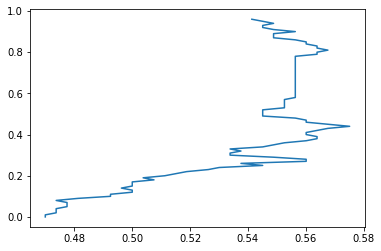

In [28]:
plt.plot(df_threshold.Accuracy,df_threshold.Threshold)
plt.title()
plt.xlabel("Accuracy", fontsize=13)
plt.ylabel("Threshold", fontsize=13)
plt.legend()
plt.show()

In [39]:
nums = [2,7,11,15]
target = 9
twoSum(nums, target)

7
2
-2
-6
{2: 0, 7: 1, 11: 2, 15: 3}


In [38]:
def twoSum(nums, target):
        d = {}
        for i, j in enumerate(nums):
            r = target - j
            print(r)
            #if r in d: return [d[r], i]
            d[j] = i
        print (d)